In [2]:
# URL: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_test = pd.read_csv("store-sales-time-series-forecasting/test.csv")
df_test.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [4]:
df_oil = pd.read_csv("store-sales-time-series-forecasting/oil.csv")
df_oil.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [5]:
df_stores = pd.read_csv("store-sales-time-series-forecasting/stores.csv")
df_stores.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
df_holidays_events = pd.read_csv("store-sales-time-series-forecasting/holidays_events.csv")
df_holidays_events.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [7]:
df_transactions = pd.read_csv("store-sales-time-series-forecasting/transactions.csv")
df_transactions.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [8]:
df_train = pd.read_csv("store-sales-time-series-forecasting/train.csv")
df_train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [9]:
plt.subplot(2,2,1, figsize=(10,10))
plt.hist(df_transactions.transactions, bins = 30)

plt.subplot(2,2,2, figsize=(10,10))
#plt.hist(df_transactions.transactions, bins = 15)
plt.hist(df_transactions.date, bins = 30)

AttributeError: 'AxesSubplot' object has no property 'figsize'

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'date(holiday)')

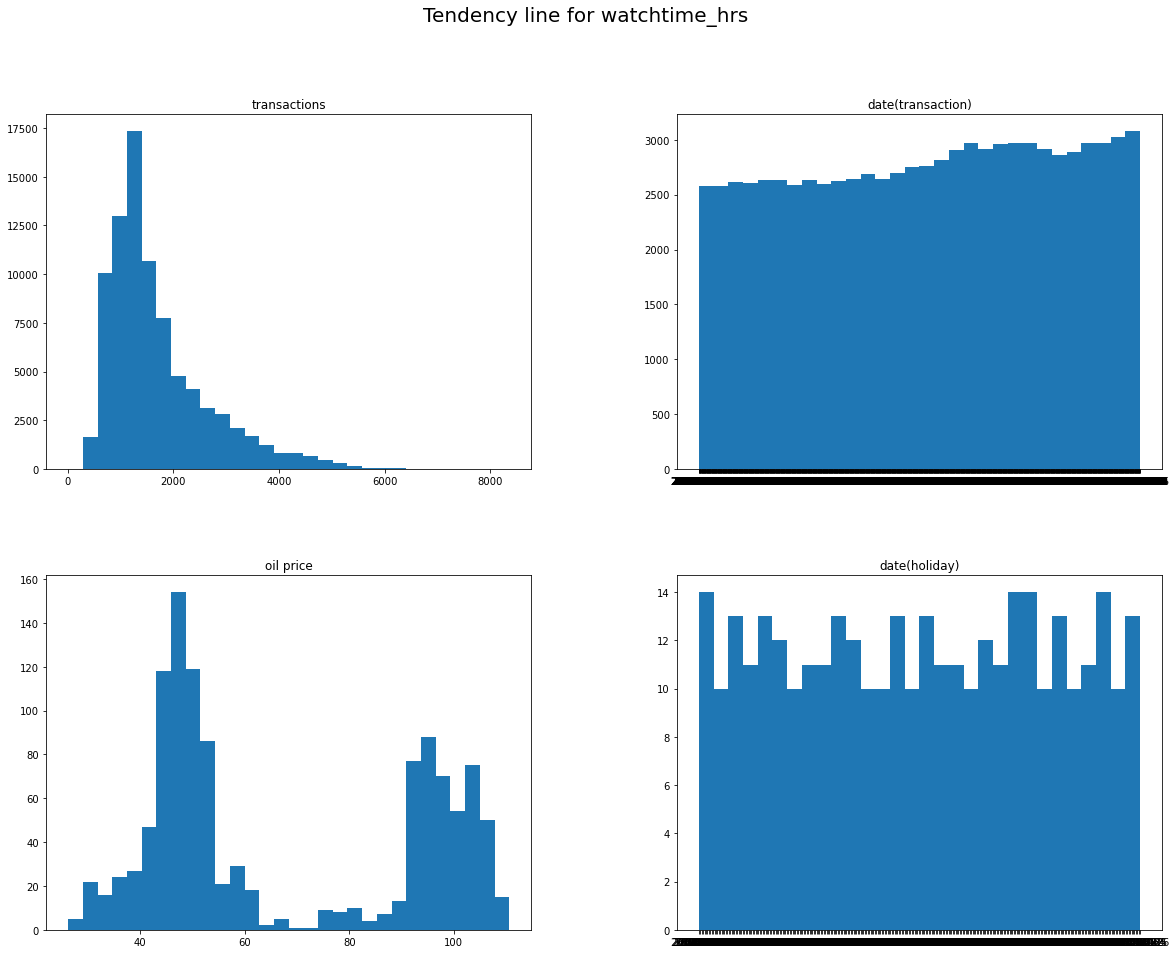

In [10]:
f, axes = plt.subplots(2, 2)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.suptitle('Data Spread with Histogram',fontsize=20)

axes[0, 0].hist(df_transactions.transactions, bins = 30)
axes[0, 0].set_title("transactions")
axes[0, 1].hist(df_transactions.date, bins = 30)
axes[0, 1].set_title("date(transaction)")

axes[1, 0].hist(df_oil.dcoilwtico, bins = 30)
axes[1, 0].set_title("oil price")
axes[1, 1].hist(df_holidays_events.date, bins = 30)
axes[1, 1].set_title("date(holiday)")


<AxesSubplot:>

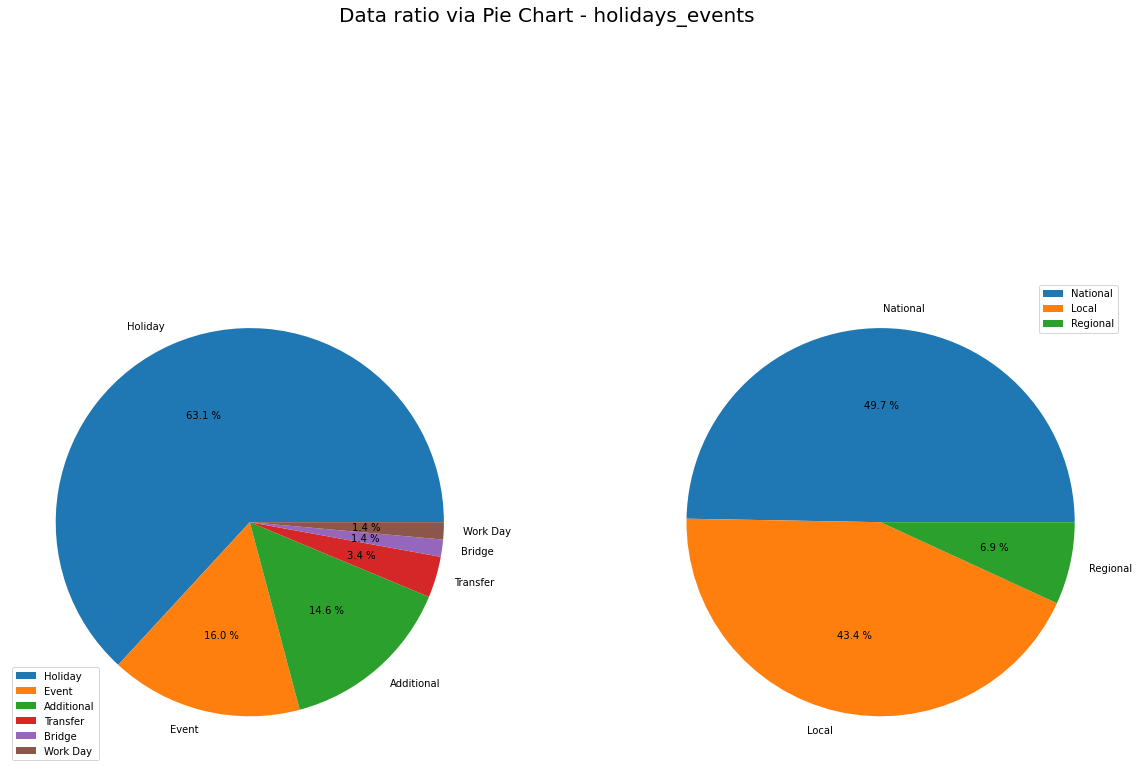

In [26]:
# Here axes contains 2 objects representing the two subplots
f, axes = plt.subplots(1, 2)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.suptitle('Data ratio via Pie Chart - holidays_events',fontsize=20)

s = pd.Series(df_holidays_events.type)
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, ax=axes[0])

s = pd.Series(df_holidays_events.locale)
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, ax=axes[1])

#s = pd.Series(df_holidays_events.locale_name)
#s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, ax=axes[2])


C:\Users\USER\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:>

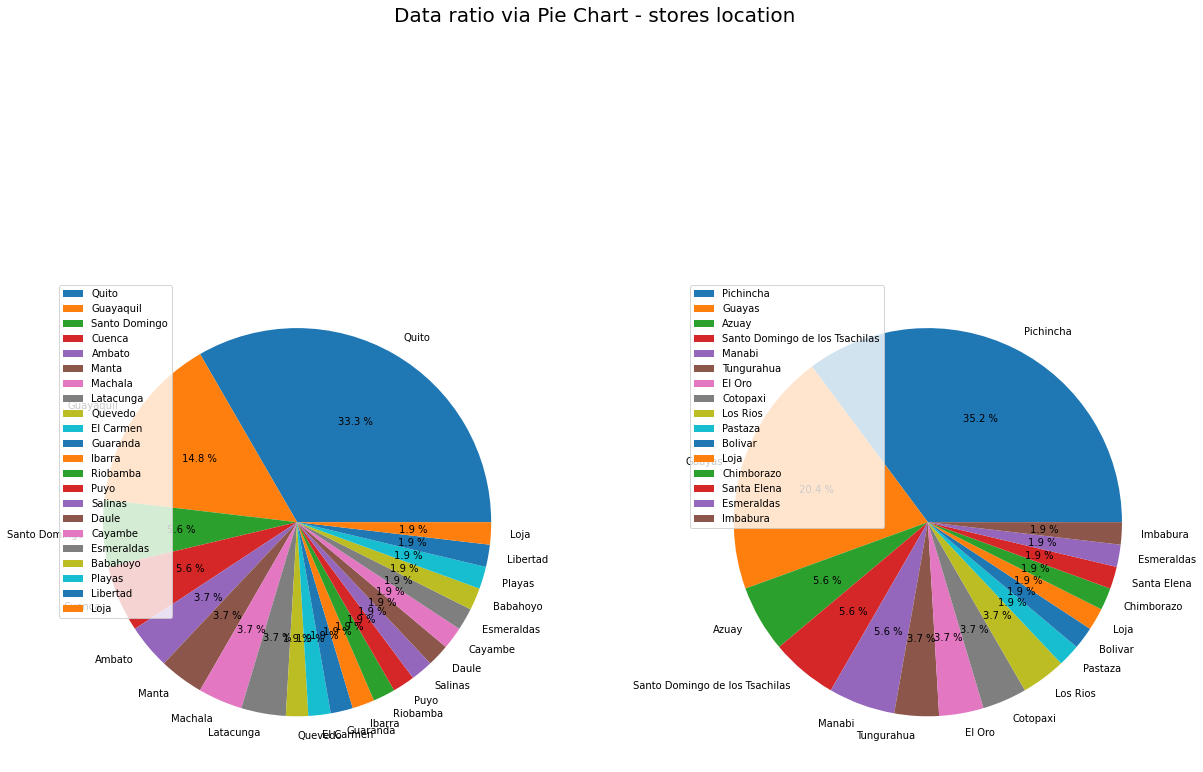

In [27]:
# Here axes contains 2 objects representing the two subplots
f, axes = plt.subplots(1, 2)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.suptitle('Data ratio via Pie Chart - stores location',fontsize=20)

s = pd.Series(df_stores.city)
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, ax=axes[0])

s = pd.Series(df_stores.state)
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, ax=axes[1])

#s = pd.Series(df_holidays_events.locale_name)
#s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, ax=axes[2])